In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range('1992-01-01', '2012-10-22')
np.random.seed(1)
pnls = np.random.randint(-990, 1000, size=len(dates)) # slight positive bias
pnls = pnls.cumsum()
positions = np.random.randint(-1, 2, size=len(dates))
positions = positions.cumsum()
strategy_performance = pd.DataFrame(index=dates, data={'PnL': pnls, 'Position': positions})
strategy_performance

,PnL,Position
1992-01-01,71,0
1992-01-02,-684,0
1992-01-03,258,1
1992-01-04,364,1
1992-01-05,1165,0
...,...,...
2012-10-18,32663,-27
2012-10-19,31822,-27
2012-10-20,32102,-26
2012-10-21,32100,-27


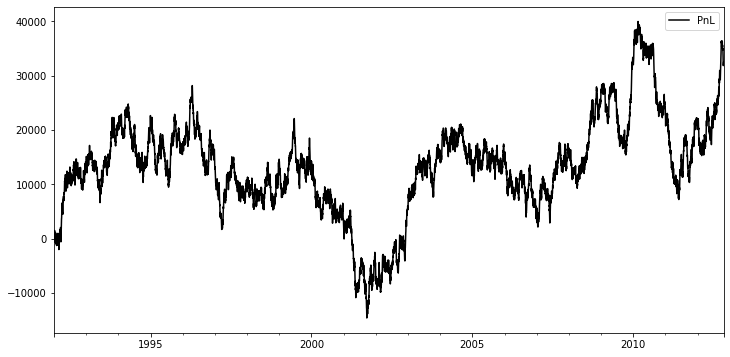

In [3]:
strategy_performance['PnL'].plot(figsize=(12,6), color='black', legend='PnL')

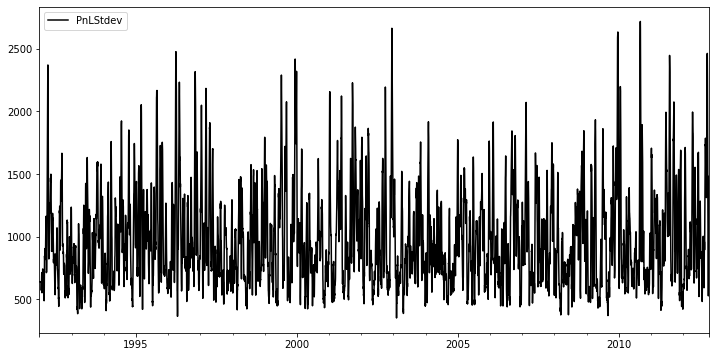

In [8]:
strategy_performance['PnLStdev'] = strategy_performance['PnL'].rolling(20).std().fillna(method='backfill')
strategy_performance['PnLStdev'].plot(figsize=(12,6), color='black', legend='PnLStdev')

In [33]:
daily_pnl_series = strategy_performance['PnL'].shift(-1) - strategy_performance['PnL']
daily_pnl_series.fillna(0, inplace=True)
avg_daily_pnl = daily_pnl_series.mean()
std_daily_pnl = daily_pnl_series.std()
sharpe_ratio = avg_daily_pnl/std_daily_pnl
sharpe_ratio

0.007417596376703097

In [35]:
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)
annualized_sharpe_ratio

0.11775069203166105

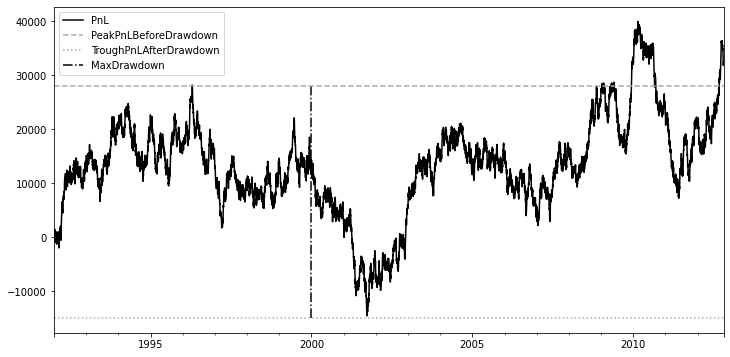

In [73]:
strategy_performance['PnL'].plot(figsize=(12,6), color='black', legend='PnL')
plt.axhline(y=28000, color='darkgrey', linestyle='--', label='PeakPnLBeforeDrawdown')
plt.axhline(y=-15000, color='darkgrey', linestyle=':', label='TroughPnLAfterDrawdown')
plt.vlines(x='2000', ymin=-15000, ymax=28000, label='MaxDrawdown', color='black', linestyle='-.')
plt.legend()

Timestamp('2000-01-01 00:00:00', freq='D')